In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df_maligant=pd.read_csv('m_train.csv')
#importing test data
maligant_test=pd.read_csv('m_test.csv')

In [3]:
#seeing what the dataset consist of
df_maligant.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
maligant_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [5]:
#Collecting the information about the dataset
df_maligant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


###### Attribute information

In [6]:
#Cheking null value
print(df_maligant.isnull().sum())
print(maligant_test.isnull().sum())

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
id              0
comment_text    0
dtype: int64


<AxesSubplot:>

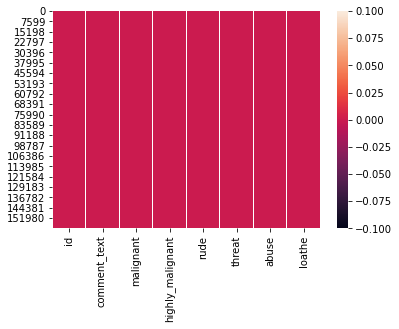

In [7]:
sns.heatmap(df_maligant.isnull())

In [8]:
#there is no null values present in the dataset

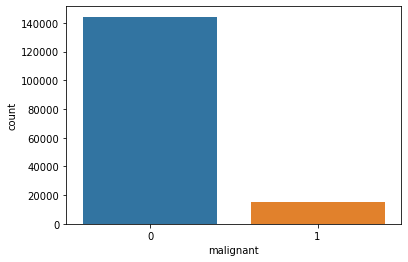

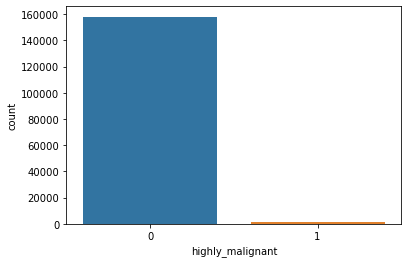

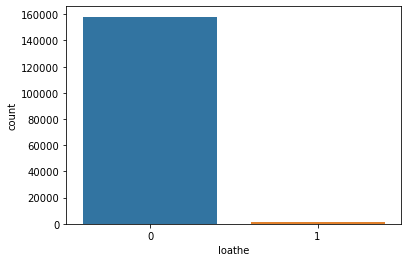

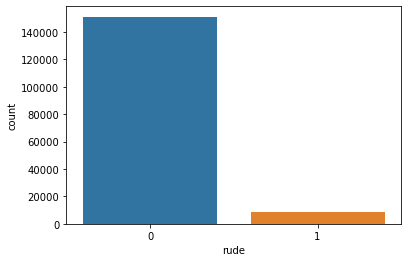

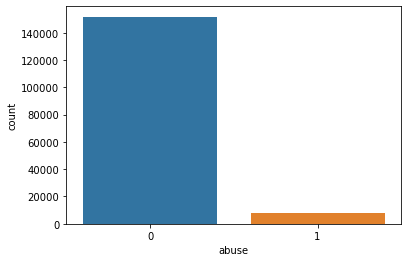

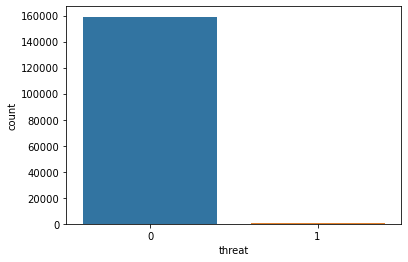

In [9]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    sns.countplot(df_maligant[i])
    plt.show()

<AxesSubplot:>

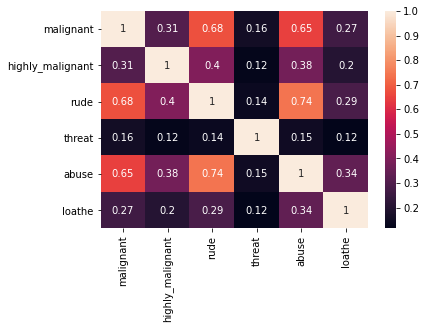

In [10]:
sns.heatmap(df_maligant.corr(),annot=True)

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
df_maligant['length']=df_maligant['comment_text'].str.len()

In [13]:
#converting all the comments in to lower case
df_maligant['comment_text']=df_maligant['comment_text'].str.lower()
maligant_test['comment_text']=maligant_test['comment_text'].str.lower()

In [14]:
stop_words = set(stopwords.words('english'))
wordnet=WordNetLemmatizer()

In [15]:
#Removing all spaces,numbers,punctuations,fullstops,commas, etc except a-z
df_maligant['comment_text'] = df_maligant['comment_text'].str.replace('[^a-zA-z]','')
maligant_test['comment_text']=maligant_test['comment_text'].str.replace('[^a-zA-Z]','')

In [16]:
df_maligant['o_length']=df_maligant['comment_text'].str.len()

In [17]:
df_maligant.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,o_length
0,0000997932d777bf,explanationwhytheeditsmadeundermyusernamehardc...,0,0,0,0,0,0,264,203
1,000103f0d9cfb60f,dawwhematchesthisbackgroundcolourimseeminglyst...,0,0,0,0,0,0,112,73
2,000113f07ec002fd,heymanimreallynottryingtoeditwaritsjustthatthi...,0,0,0,0,0,0,233,186
3,0001b41b1c6bb37e,moreicantmakeanyrealsuggestionsonimprovementiw...,0,0,0,0,0,0,622,488
4,0001d958c54c6e35,yousiraremyheroanychanceyourememberwhatpagetha...,0,0,0,0,0,0,67,50


In [18]:
#here we can see that after removing puntuations the lenth of the comment decreases

In [19]:
#removing stopwords
df_maligant['comment_text']=df_maligant['comment_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

maligant_test['comment_text']=maligant_test['comment_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

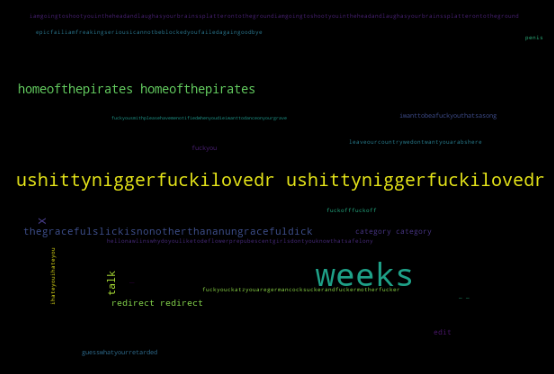

In [20]:
#Getting loud words which are offensive
from wordcloud import WordCloud
hams = df_maligant['comment_text'][df_maligant['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,5),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
comment_cat=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [22]:
target_label = df_maligant[comment_cat]

df_maligant['label'] =df_maligant[comment_cat].sum(axis =1)
print(df_maligant['label'].value_counts())
df_maligant['label'] = df_maligant['label'] > 0 
df_maligant['label'] = df_maligant['label'].astype(int)
print(df_maligant['label'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64
0    143346
1     16225
Name: label, dtype: int64


In [33]:
#Converting text into vectors using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tcv=TfidfVectorizer()
x=tcv.fit_transform(df_maligant['comment_text'])

In [24]:
y=df_maligant['label'] 

In [25]:
df_maligant.drop(['id','malignant','highly_malignant','rude','threat','abuse','loathe','length','o_length','label'],axis=1,inplace=True)

In [26]:
maligant_test.drop(['id'],axis=1,inplace=True)

In [34]:
x_ttest=tcv.fit_transform(maligant_test['comment_text'])

In [30]:
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [35]:
# finding best random state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    #print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i   
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)

The maximum Accuracy_score is  0.9014256619144603 at random state 84


In [36]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=84)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(127656, 166330) (31915, 166330) (127656,) (31915,)


##### Hyperparameter tunning

In [82]:
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x,y)
gd.best_params_

{'penalty': 'l2'}

In [28]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x,y)
gd.best_params_

{'n_neighbors': 1}



LogisticRegression()


ACCURACY_SCORE = 0.9014256619144603


ROC_AUC_SCORE = 0.5001588814744201


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.90      1.00      0.95     28768
           1       1.00      0.00      0.00      3147

    accuracy                           0.90     31915
   macro avg       0.95      0.50      0.47     31915
weighted avg       0.91      0.90      0.85     31915



[[28768     0]
 [ 3146     1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



KNeighborsClassifier(n_neighbors=1)


ACCURACY_SCORE = 0.9024283252389159


ROC_AUC_SCORE = 0.5063750970696883


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.90      1.00      0.95     28768
           1       0.84      0.01      0.03      3147

    accuracy                           0.90     31915
   macro avg       0.87      0.51      0.49     31915
weighted avg       0.90      0.90      0.86   

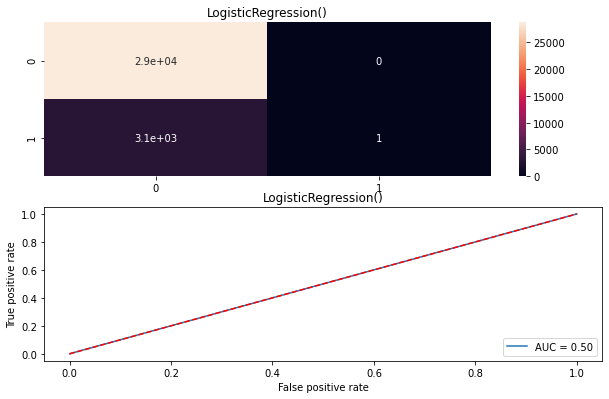

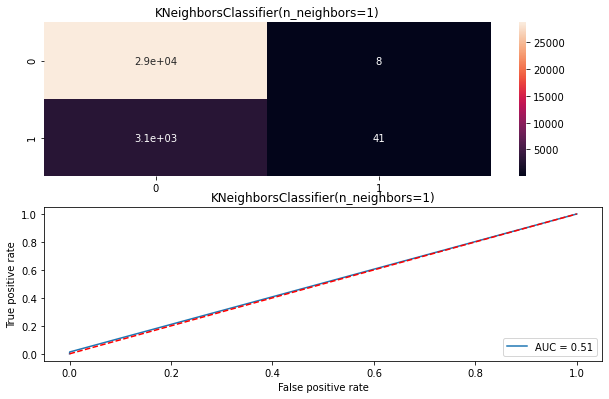

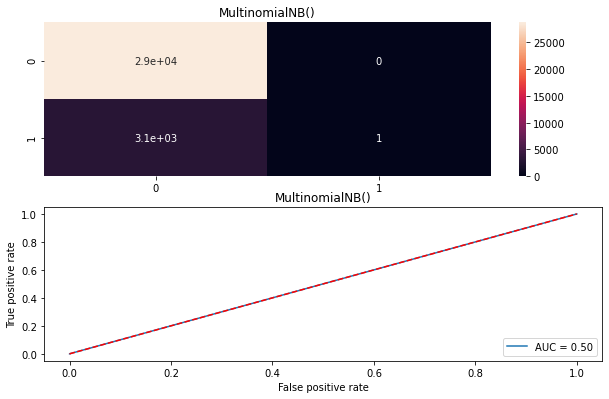

In [37]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=1),MultinomialNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          
    

In [41]:
outcome=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','MultinomialNB'],'Accuracy_Score':[0.9014,0.9024,0.9014]})
outcome

,Model,Accuracy_Score
0,LogisticRegression,0.9014
1,KNeighborsClassifier,0.9024
2,MultinomialNB,0.9014


In [38]:
#finalizing KNeighborsClassifier as it is giving good result
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)


Accuracy Score = 0.9024283252389159
